In [22]:
# NAME: YUN ZHOU (Student ID: 1009709442)
# Assignment 2: INF2178 Technical Assignment 2
# code inputs part

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat


# Load the dataset
file_path = 'INF2178_A2_data.xlsx'#place the xlsx file under same directory
data = pd.read_excel(file_path, sheet_name='ChildCareCentres')

#print out first 5 rows of data
data.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [24]:
#selecting only the necessary columns for ANOVA
anova_data = data[[ 'AUSPICE', 'subsidy','TOTSPACE']]
#convert type
anova_data.loc[:,'AUSPICE'] = anova_data['AUSPICE'].astype('category')
anova_data.loc[:,'subsidy'] = anova_data['subsidy'].astype('category')
# anova_data.loc[:,'TOTSPACE'] = anova_data['TOTSPACE'].astype('float')
# ToTSPACE is continuous variable, AUSPICE', 'subsidy are categorical variables.

<ipython-input-24-3f11b611ce0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_data.loc[:,'AUSPICE'] = anova_data['AUSPICE'].astype('category')
<ipython-input-24-3f11b611ce0e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  anova_data.loc[:,'AUSPICE'] = anova_data['AUSPICE'].astype('category')
<ipython-input-24-3f11b611ce0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

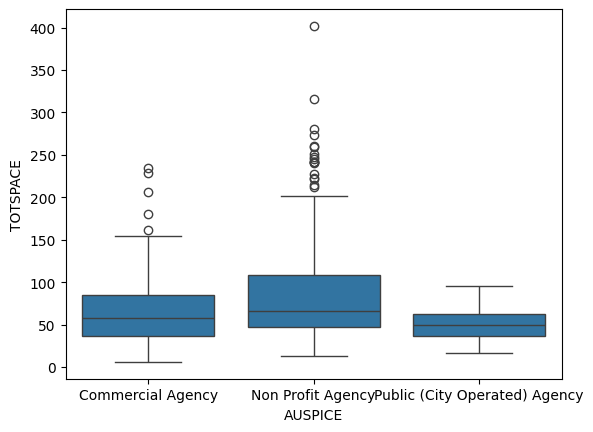

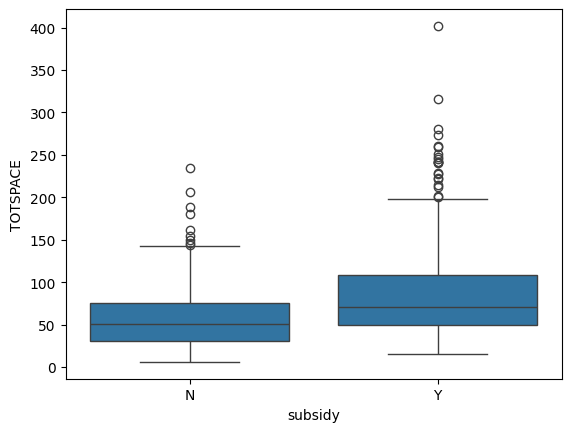

In [25]:
# Visualizing Data Distribution
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=anova_data)
plt.show()

sns.boxplot(x='subsidy', y='TOTSPACE', data=anova_data)
plt.show()

In [26]:
# Performing the one-way ANOVAs
# For 'AUSPICE'
model_auspice = ols('TOTSPACE ~ C(AUSPICE)', data=anova_data).fit()
anova_table_auspice = sm.stats.anova_lm(model_auspice, typ=2)

# For 'subsidy'
model_subsidy = ols('TOTSPACE ~ C(subsidy)', data=anova_data).fit()
anova_table_subsidy = sm.stats.anova_lm(model_subsidy, typ=2)

print(anova_table_auspice)
print(anova_table_subsidy)

                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN
                  sum_sq      df          F        PR(>F)
C(subsidy)  1.607654e+05     1.0  75.227653  1.550892e-17
Residual    2.267412e+06  1061.0        NaN           NaN


In [27]:
#post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=anova_data, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


In [28]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=anova_data, res_var='TOTSPACE', xfac_var='subsidy', anova_model='TOTSPACE ~ C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,26.265831,20.323646,32.208016,12.266022,0.001


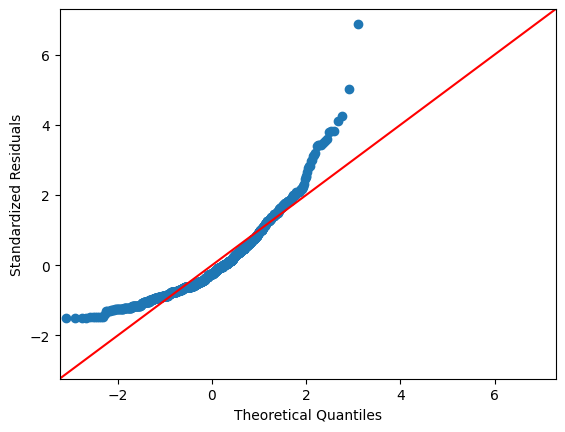

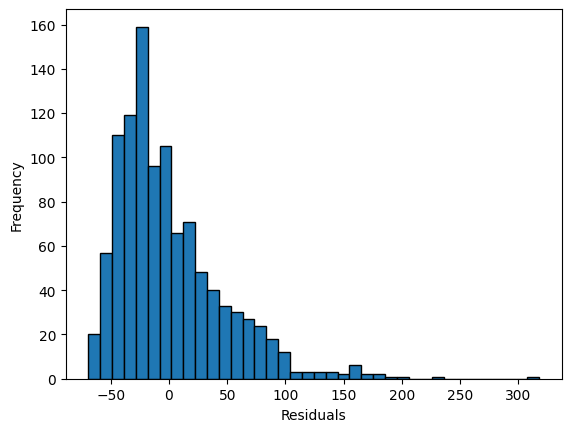

In [29]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [30]:
# Checking assumptions for 'subsidy'
# 1. Normality of residuals using Shapiro-Wilk test
w, pvalue = stats.shapiro(model_subsidy.resid)
normality_test = {'W': w, 'p-value': pvalue}

# 2. Homogeneity of variances using Levene's test
w, pvalue = stats.levene(anova_data['TOTSPACE'][anova_data['subsidy'] == 'Y'],
                         anova_data['TOTSPACE'][anova_data['subsidy'] == 'N'])
levene_test = {'W': w, 'p-value': pvalue}

# 3. Homogeneity of variances using Bartlett's test (for normally distributed data)
w, pvalue = stats.bartlett(anova_data['TOTSPACE'][anova_data['subsidy'] == 'Y'],
                           anova_data['TOTSPACE'][anova_data['subsidy'] == 'N'])
bartlett_test = {'W': w, 'p-value': pvalue}


print('Normality test using Shapiro-Wilk test: ',normality_test)
print('Homogeneity of variances using Levenes test: ',levene_test)
print('Homogeneity of variances using Bartletts test: ',bartlett_test)


Normality test using Shapiro-Wilk test:  {'W': 0.8925794959068298, 'p-value': 1.4240603342711214e-26}
Homogeneity of variances using Levenes test:  {'W': 22.988879302520136, 'p-value': 1.8617545516099655e-06}
Homogeneity of variances using Bartletts test:  {'W': 49.081859352317615, 'p-value': 2.45500187845506e-12}


In [31]:
# Check assumptions for 'AUSPICE'
# 1. Normality of residuals using Shapiro-Wilk test
shapiro_test = stats.shapiro(model_auspice.resid)

# 2. Homogeneity of variances using Levene's test
levene_test = stats.levene(
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Commercial Agency'],
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Non Profit Agency'],
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Public (City Operated) Agency'],
    center='mean'  # We use the mean because it's more robust against non-normal distributions
)

# 3. Homogeneity of variances using Bartlett's test (for normally distributed data)
bartlett_test = stats.bartlett(
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Commercial Agency'],
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Non Profit Agency'],
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Public (City Operated) Agency']
)


print('Normality test using Shapiro-Wilk test: ',shapiro_test)
print('Homogeneity of variances using Levenes test: ',levene_test)
print('Homogeneity of variances using Bartletts test: ',bartlett_test)



Normality test using Shapiro-Wilk test:  ShapiroResult(statistic=0.901775598526001, pvalue=1.4964898448030214e-25)
Homogeneity of variances using Levenes test:  LeveneResult(statistic=28.155262339546614, pvalue=1.2191253050437487e-12)
Homogeneity of variances using Bartletts test:  BartlettResult(statistic=89.58603867335393, pvalue=3.520779884632816e-20)


<Axes: xlabel='AUSPICE', ylabel='TOTSPACE'>

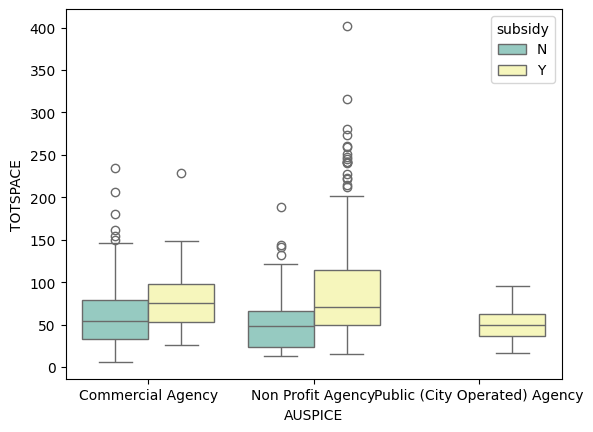

In [32]:
###2 way anovas
#box plot
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=anova_data, palette="Set3")

In [33]:
# Performing the two-way ANOVA
model_two_way = ols('TOTSPACE ~ C(AUSPICE)+C(subsidy)+C(AUSPICE):C(subsidy)', data=anova_data).fit()
anova_table_two_way = sm.stats.anova_lm(model_two_way, typ=2)
anova_table_two_way

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [34]:
res = stat()
res.anova_stat(df=anova_data, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


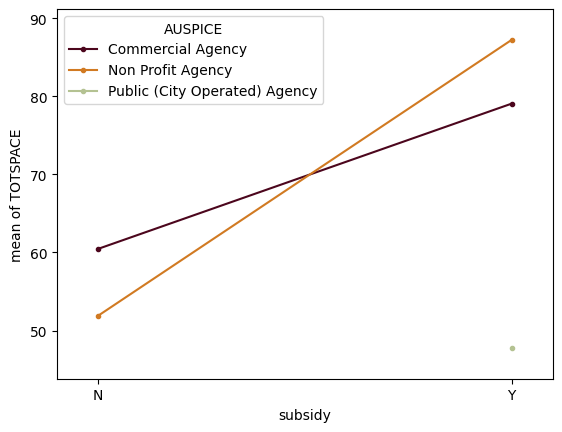

In [35]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

anova_data_textType=pd.DataFrame()

anova_data_textType['AUSPICE'] = anova_data['AUSPICE'].astype('str')
anova_data_textType['subsidy'] = anova_data['subsidy'].astype('str')
anova_data_textType['TOTSPACE'] = anova_data['TOTSPACE']
# anova_data.loc[:,'TOTSPACE'] = anova_data['TOTSPACE'].astype('float')

fig = interaction_plot(x=anova_data_textType['subsidy'],trace=anova_data_textType['AUSPICE'],response=anova_data_textType['TOTSPACE'],colors=['#4c061d','#d17a22','#b4c292'])
plt.show()

In [36]:
# Perform post-hoc tests using statsmodels for pairwise comparisons
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post-hoc test for 'AUSPICE'
tukey_auspice = pairwise_tukeyhsd(endog=anova_data['TOTSPACE'], groups=anova_data['AUSPICE'], alpha=0.05)

# Post-hoc test for 'subsidy'
tukey_subsidy = pairwise_tukeyhsd(endog=anova_data['TOTSPACE'], groups=anova_data['subsidy'], alpha=0.05)


# Output the results of the post-hoc tests and assumption checks
print(tukey_auspice.summary())
print(tukey_subsidy.summary())


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     N      Y  26.2658   0.0 20.3236 32.208   True
--------------------------------------------------


In [37]:
# two-way ANOVA and the additional analysis

# Now, let's perform post-hoc tests and assumption checks
# Post-hoc test using Tukey's HSD
post_hoc = stat()
post_hoc.tukey_hsd(df=anova_data, res_var='TOTSPACE', xfac_var=['AUSPICE','subsidy'], anova_model='TOTSPACE ~ C(AUSPICE)+C(subsidy)+C(AUSPICE):C(subsidy)')
tukey_summary = post_hoc.tukey_summary


# Output the results
anova_table_two_way, tukey_summary


/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

(                             sum_sq      df          F        PR(>F)
 C(AUSPICE)             8.567996e+03     2.0   2.057586  1.282730e-01
 C(subsidy)             8.352744e+04     1.0  40.117876  3.529094e-10
 C(AUSPICE):C(subsidy)  5.603445e+04     2.0  13.456555  1.694282e-06
 Residual               2.202809e+06  1058.0        NaN           NaN,
                                 group1                              group2  \
 0               (Non Profit Agency, Y)              (Non Profit Agency, N)   
 1               (Non Profit Agency, Y)              (Commercial Agency, Y)   
 2               (Non Profit Agency, Y)              (Commercial Agency, N)   
 3               (Non Profit Agency, Y)  (Public (City Operated) Agency, Y)   
 4               (Non Profit Agency, Y)  (Public (City Operated) Agency, N)   
 5               (Non Profit Agency, N)              (Commercial Agency, Y)   
 6               (Non Profit Agency, N)              (Commercial Agency, N)   
 7               

In [38]:
# Checking assumptions for 'subsidy'
# 1. Normality of residuals using Shapiro-Wilk test
w, pvalue = stats.shapiro(model_two_way.resid)
normality_test = {'W': w, 'p-value': pvalue}

# 2. Homogeneity of variances using Levene's test
w, pvalue = stats.levene(anova_data['TOTSPACE'][anova_data['subsidy'] == 'Y'],
                         anova_data['TOTSPACE'][anova_data['subsidy'] == 'N'])
levene_test = {'W': w, 'p-value': pvalue}

# 3. Homogeneity of variances using Bartlett's test (for normally distributed data)
w, pvalue = stats.bartlett(anova_data['TOTSPACE'][anova_data['subsidy'] == 'Y'],
                           anova_data['TOTSPACE'][anova_data['subsidy'] == 'N'])
bartlett_test = {'W': w, 'p-value': pvalue}


print('Normality test using Shapiro-Wilk test: ',normality_test)
print('Homogeneity of variances using Levenes test: ',levene_test)
print('Homogeneity of variances using Bartletts test: ',bartlett_test)


Normality test using Shapiro-Wilk test:  {'W': 0.9018619656562805, 'p-value': 1.5311055543621852e-25}
Homogeneity of variances using Levenes test:  {'W': 22.988879302520136, 'p-value': 1.8617545516099655e-06}
Homogeneity of variances using Bartletts test:  {'W': 49.081859352317615, 'p-value': 2.45500187845506e-12}


In [39]:
# Check assumptions for two-way ANOVA for 'AUSPICE'
# 1. Normality of residuals using Shapiro-Wilk test
shapiro_test = stats.shapiro(model_two_way.resid)

# 2. Homogeneity of variances using Levene's test
levene_test = stats.levene(
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Commercial Agency'],
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Non Profit Agency'],
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Public (City Operated) Agency'],
    center='mean'  # We use the mean because it's more robust against non-normal distributions
)

# 3. Homogeneity of variances using Bartlett's test (for normally distributed data)
bartlett_test = stats.bartlett(
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Commercial Agency'],
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Non Profit Agency'],
    anova_data['TOTSPACE'][anova_data['AUSPICE'] == 'Public (City Operated) Agency']
)


print('Normality test using Shapiro-Wilk test: ',shapiro_test)
print('Homogeneity of variances using Levenes test: ',levene_test)
print('Homogeneity of variances using Bartletts test: ',bartlett_test)



Normality test using Shapiro-Wilk test:  ShapiroResult(statistic=0.9018619656562805, pvalue=1.5311055543621852e-25)
Homogeneity of variances using Levenes test:  LeveneResult(statistic=28.155262339546614, pvalue=1.2191253050437487e-12)
Homogeneity of variances using Bartletts test:  BartlettResult(statistic=89.58603867335393, pvalue=3.520779884632816e-20)


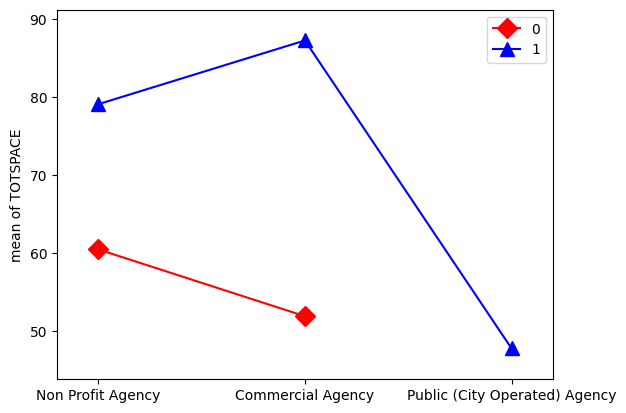

In [40]:
# Now let's plot the interaction plot for 'AUSPICE' and 'subsidy' using TOTSPACE
from statsmodels.graphics.factorplots import interaction_plot

# Extract the unique levels of AUSPICE and subsidy for plotting
unique_auspices = anova_data['AUSPICE'].unique()
unique_subsidies = anova_data['subsidy'].unique()

# Generate the interaction plot
fig = interaction_plot(x=anova_data['AUSPICE'].cat.codes,
                       trace=anova_data['subsidy'].cat.codes,
                       response=anova_data['TOTSPACE'],
                       colors=['red', 'blue'],
                       markers=['D', '^'], ms=10)

# Set the x-tick labels to the unique auspices
plt.xticks(range(len(unique_auspices)), unique_auspices)

# Show the plot
plt.show()
